# Bach Chorales Harmony

Учитывая музыкальный поток, задача анализа гармонии музыки состоит в том, чтобы связать метку аккорда с каждой точкой времени. Такие ярлыки показывают основную гармонию, указывая фундаментальную ноту (корень) и режим, используя имена аккордов, такие как C minor.

Набор данных состоит из 60 хоралов (5665 событий) J.S. Бах (1675-1750). Каждое событие каждого хорала помечено, используя 1 из 101 аккордовых меток.
Количество атрибутов: 17 (имя последовательности, номер события, наличие метки (x12), аккорд).

Информация о высотных классах была извлечена из загруженных источников MIDI от (JSB Chorales) [http://www.jsbchorales.net]. Информация о метре были рассчитаны через программу Meter, которая является частью Melisma музыкальный анализатор (Melisma) [http://www.link.cs.cmu.edu/music-analysis/]. Рукописные ярлыки вручную аннотируются экспертом-человеком.

## Описание данных

   * ***Choral ID***: соответствует именам файлов из (Bach Central) [http://www.bachcentral.com];
   * ***Event number***:  индекс (начиная с 1) события внутри хорала;
   * ***Pitch classes(C..B) (x12)***: YES / NO в зависимости от того, присутствует ли данный высотный класс [https://ru.wikipedia.org/wiki/Высотный_класс];
   * ***Pitch class Bass***: высотный класс басовой ноты;
   * ***Meter***: целые числа от 1 до 5, меньшие числа обозначают менее акцентированные события, более высокие числа обозначают более акцентированные события;
   * ***Chord label***: аккорд, резонирующий во время данного события.

Подключаем используемые в работе библиотеки

In [2]:
import numpy  as np
import matplotlib.pyplot  as plt
import pandas as pd
%matplotlib inline

Считываем данные из датасета

In [3]:
data = pd.read_csv('source/jsbach_chorals_harmony.data', sep = ',', engine = 'python')

Контроль ввода

In [4]:
data

,Choral ID,Event number,Pitch class C,Pitch class C#,Pitch class D,Pitch class D#,Pitch class E,Pitch class F,Pitch class F#,Pitch class G,Pitch class G#,Pitch class A,Pitch class A#,Pitch class B,Pitch class Bass,Meter,Chord label
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M
5,000106b_,6,NO,NO,YES,NO,NO,YES,NO,NO,NO,YES,NO,NO,D,4,D_m
6,000106b_,7,NO,NO,YES,NO,NO,YES,NO,NO,NO,YES,NO,NO,D,2,D_m
7,000106b_,8,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,A,3,F_M
8,000106b_,9,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,A,2,F_M
9,000106b_,10,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,YES,NO,Bb,5,BbM


Контроль размеров таблицы и наименования признаков(столбцов)

In [5]:
print(data.shape)
print(data.columns)

(5665, 17)
Index(['Choral ID', 'Event number', 'Pitch class C', 'Pitch class C#',
       'Pitch class D', 'Pitch class D#', 'Pitch class E', 'Pitch class F',
       'Pitch class F#', 'Pitch class G', 'Pitch class G#', 'Pitch class A',
       'Pitch class A#', 'Pitch class B', 'Pitch class Bass', 'Meter',
       'Chord label'],
      dtype='object')


Основные сведения по данным, из таблицы видно, что пропусков в данных нет, уже хорошо, большинство признаков бинарные.

In [6]:
data.describe(include = ['object'])

,Choral ID,Pitch class C,Pitch class C#,Pitch class D,Pitch class D#,Pitch class E,Pitch class F,Pitch class F#,Pitch class G,Pitch class G#,Pitch class A,Pitch class A#,Pitch class B,Pitch class Bass,Chord label
count,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665
unique,62,2,2,2,2,2,2,2,2,2,2,2,2,16,102
top,002908ch,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,D,D_M
freq,206,3875,4711,3300,4956,3540,4381,4253,3523,5006,3290,4644,3874,689,503


Слияние двух таблиц выше, максимальная полнота сведений о данных

In [7]:
data.describe(include = 'all')

,Choral ID,Event number,Pitch class C,Pitch class C#,Pitch class D,Pitch class D#,Pitch class E,Pitch class F,Pitch class F#,Pitch class G,Pitch class G#,Pitch class A,Pitch class A#,Pitch class B,Pitch class Bass,Meter,Chord label
count,5665,5665.000000,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665.000000,5665
unique,62,NaN,2,2,2,2,2,2,2,2,2,2,2,2,16,NaN,102
top,002908ch,NaN,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,D,NaN,D_M
freq,206,NaN,3875,4711,3300,4956,3540,4381,4253,3523,5006,3290,4644,3874,689,NaN,503
mean,NaN,53.374404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.134863,NaN
std,NaN,37.268208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.109710,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
50%,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN
75%,NaN,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN


## Подготовка данных

   Выбросим признак Choral ID, поскольку от названия произведения мало что зависит, также мало что зависит от порядкового номера события, значит Event Number выбрасываем туда-же. 
   Задача состоит в предсказании резонирующего в данный момент аккорда по встречающимся или не встречающимся высотным классам основного исполнения и баса. Большинство признаков бинарных, остаётся только придумать, что делать с категориальным признаком Pitch Class Bass, например векторизовать его.

In [8]:
data = data.drop('Choral ID', axis=1)
data = data.drop('Event number', axis=1)

Поскольку столбец Chord label содержит ответ, уберём из таблицы и его

In [9]:
y = data['Chord label']
data = data.drop('Chord label', axis=1)

In [10]:
data.head()

,Pitch class C,Pitch class C#,Pitch class D,Pitch class D#,Pitch class E,Pitch class F,Pitch class F#,Pitch class G,Pitch class G#,Pitch class A,Pitch class A#,Pitch class B,Pitch class Bass,Meter
0,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3
1,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5
2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2
3,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3
4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2


In [11]:
data['Pitch class Bass'].unique()

array(['F', 'E', 'D', 'A', 'Bb', 'C', 'G', 'B', 'F#', 'C#', 'Eb', 'D#',
       'G#', 'A#', 'Ab', 'Db'], dtype=object)

Имеются повторяющиеся с точки зрения музыки, но разные по названию ноты (классы), приведём их к стандарту как в заголовке таблицы для основного звучания(C, C# = Db, D, D# = Eb, E, F, F#, G, G# = Ab, A, A# = Bb, B).

In [12]:
d = {'Bb' : 'A#', 'Db' : 'C#', 'Eb': 'D#', 'Ab' : 'G#'}
data = data.replace({'Pitch class Bass': d})
#data

Разобьём таблицу на части по типу признака

In [13]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Pitch class C', 'Pitch class C#', 'Pitch class D', 'Pitch class D#', 'Pitch class E', 'Pitch class F', 'Pitch class F#', 'Pitch class G', 'Pitch class G#', 'Pitch class A', 'Pitch class A#', 'Pitch class B', 'Pitch class Bass']
['Meter']


In [14]:
data_describe = data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Pitch class C', 'Pitch class C#', 'Pitch class D', 'Pitch class D#', 'Pitch class E', 'Pitch class F', 'Pitch class F#', 'Pitch class G', 'Pitch class G#', 'Pitch class A', 'Pitch class A#', 'Pitch class B'] ['Pitch class Bass']


Бинарный признак делаем с циферками

In [15]:
data.at[data['Pitch class C'] != 'YES', 'Pitch class C'] = 0
data.at[data['Pitch class C'] == 'YES', 'Pitch class C'] = 1
data.at[data['Pitch class C#'] != 'YES', 'Pitch class C#'] = 0
data.at[data['Pitch class C#'] == 'YES', 'Pitch class C#'] = 1
data.at[data['Pitch class D'] != 'YES', 'Pitch class D'] = 0
data.at[data['Pitch class D'] == 'YES', 'Pitch class D'] = 1
data.at[data['Pitch class D#'] != 'YES', 'Pitch class D#'] = 0
data.at[data['Pitch class D#'] == 'YES', 'Pitch class D#'] = 1
data.at[data['Pitch class E'] != 'YES', 'Pitch class E'] = 0
data.at[data['Pitch class E'] == 'YES', 'Pitch class E'] = 1
data.at[data['Pitch class F'] != 'YES', 'Pitch class F'] = 0
data.at[data['Pitch class F'] == 'YES', 'Pitch class F'] = 1
data.at[data['Pitch class F#'] != 'YES', 'Pitch class F#'] = 0
data.at[data['Pitch class F#'] == 'YES', 'Pitch class F#'] = 1
data.at[data['Pitch class G'] != 'YES', 'Pitch class G'] = 0
data.at[data['Pitch class G'] == 'YES', 'Pitch class G'] = 1
data.at[data['Pitch class G#'] != 'YES', 'Pitch class G#'] = 0
data.at[data['Pitch class G#'] == 'YES', 'Pitch class G#'] = 1
data.at[data['Pitch class A'] != 'YES', 'Pitch class A'] = 0
data.at[data['Pitch class A'] == 'YES', 'Pitch class A'] = 1
data.at[data['Pitch class A#'] != 'YES', 'Pitch class A#'] = 0
data.at[data['Pitch class A#'] == 'YES', 'Pitch class A#'] = 1
data.at[data['Pitch class B'] != 'YES', 'Pitch class B'] = 0
data.at[data['Pitch class B'] == 'YES', 'Pitch class B'] = 1

Векторизуем единственный оставшийся категориальный признак с помощью метода get_dummies из pandas:

In [16]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Pitch class Bass_A', 'Pitch class Bass_A#', 'Pitch class Bass_B',
       'Pitch class Bass_C', 'Pitch class Bass_C#', 'Pitch class Bass_D',
       'Pitch class Bass_D#', 'Pitch class Bass_E', 'Pitch class Bass_F',
       'Pitch class Bass_F#', 'Pitch class Bass_G', 'Pitch class Bass_G#'],
      dtype='object')


## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [17]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Meter
count,5665.000000
mean,3.134863
std,1.109710
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [18]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [19]:
data_numerical.describe()

,Meter
count,5.665000e+03
mean,-1.053605e-15
std,1.000000e+00
min,-1.923803e+00
25%,-1.022667e+00
50%,-1.215302e-01
75%,7.796064e-01
max,1.680743e+00


## Соединяем всё в одну таблицу

In [20]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(5665, 25)


In [21]:
data.describe()


,Meter,Pitch class Bass_A,Pitch class Bass_A#,Pitch class Bass_B,Pitch class Bass_C,Pitch class Bass_C#,Pitch class Bass_D,Pitch class Bass_D#,Pitch class Bass_E,Pitch class Bass_F,...,Pitch class D,Pitch class D#,Pitch class E,Pitch class F,Pitch class F#,Pitch class G,Pitch class G#,Pitch class A,Pitch class A#,Pitch class B
count,5.665000e+03,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,...,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000
mean,-1.053605e-15,0.121447,0.055075,0.079259,0.105914,0.038482,0.121624,0.044307,0.119682,0.081553,...,0.417476,0.125154,0.375110,0.226655,0.249250,0.378111,0.116328,0.419241,0.180229,0.316152
std,1.000000e+00,0.326675,0.228147,0.270166,0.307754,0.192374,0.326880,0.205795,0.324618,0.273707,...,0.493186,0.330923,0.484194,0.418704,0.432617,0.484958,0.320647,0.493478,0.384412,0.465014
min,-1.923803e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.022667e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.215302e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.796064e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.680743e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Всё в порядке, 25 и ожидалось

## Х и У

In [22]:
X = data
feature_names = X.columns

In [23]:
y.describe()

count     5665
unique     102
top        D_M
freq       503
Name: Chord label, dtype: object

In [24]:
type(feature_names)

pandas.core.indexes.base.Index

In [25]:
feature_names

Index(['Meter', 'Pitch class Bass_A', 'Pitch class Bass_A#',
       'Pitch class Bass_B', 'Pitch class Bass_C', 'Pitch class Bass_C#',
       'Pitch class Bass_D', 'Pitch class Bass_D#', 'Pitch class Bass_E',
       'Pitch class Bass_F', 'Pitch class Bass_F#', 'Pitch class Bass_G',
       'Pitch class Bass_G#', 'Pitch class C', 'Pitch class C#',
       'Pitch class D', 'Pitch class D#', 'Pitch class E', 'Pitch class F',
       'Pitch class F#', 'Pitch class G', 'Pitch class G#', 'Pitch class A',
       'Pitch class A#', 'Pitch class B'],
      dtype='object')

In [26]:
print(X.shape)
print(y.shape)
N, d = X.shape

(5665, 25)
(5665,)


In [27]:
type(X)

pandas.core.frame.DataFrame

In [28]:
type(y)

pandas.core.series.Series

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

3965 1700


In [30]:
3965+1700

5665

## Задание №3. Построить  1) random forests, 2) extremely random forests, 3) adaboost, 4) gradient boosted trees.

### 1) random forests


In [34]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.11778058007566204 0.2723529411764706


In [73]:
tree_arr = np.linspace(100, 1100, 11)
tree_arr = tree_arr.astype('int')
print(tree_arr)
test_err = []
train_err = []
for tree in tree_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = tree)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

[ 100  200  300  400  500  600  700  800  900 1000 1100]


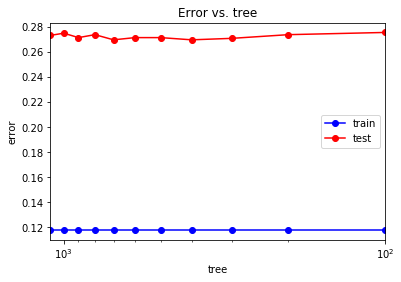

In [74]:
plt.semilogx(tree_arr, train_err, 'b-o', label = 'train')
plt.semilogx(tree_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(tree_arr), np.min(tree_arr)])
plt.title('Error vs. tree')
plt.xlabel('tree')
plt.ylabel('error')
plt.legend()
pass

### 2) extremely random forests

In [75]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.11778058007566204 0.2776470588235294


In [76]:
tree_arr_ert = np.linspace(100, 1000, 10)
tree_arr_ert = tree_arr_ert.astype('int')
print(tree_arr_ert)
test_err = []
train_err = []
for tree in tree_arr_ert:
    ert = ensemble.ExtraTreesClassifier(n_estimators = tree)
    ert.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

[ 100  200  300  400  500  600  700  800  900 1000 1100]


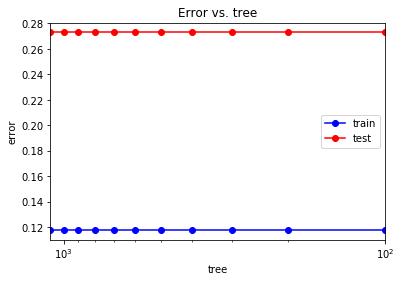

In [77]:
plt.semilogx(tree_arr_ert, train_err, 'b-o', label = 'train')
plt.semilogx(tree_arr_ert, test_err, 'r-o', label = 'test')
plt.xlim([np.max(tree_arr_ert), np.min(tree_arr_ert)])
plt.title('Error vs. tree')
plt.xlabel('tree')
plt.ylabel('error')
plt.legend()
pass

### 3) adaboost

In [78]:
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.8007566204287516 0.8241176470588235


In [79]:
tree_arr_ada = np.linspace(100, 1000, 10)
tree_arr_ada = tree_arr_ada.astype('int')
print(tree_arr_ada)
test_err = []
train_err = []
for tree in tree_arr_ada:
    ert = ensemble.AdaBoostClassifier(n_estimators = tree)
    ert.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

[ 100  200  300  400  500  600  700  800  900 1000 1100]


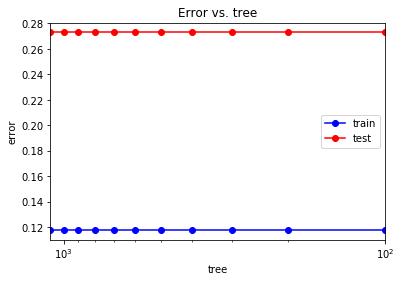

In [80]:
plt.semilogx(tree_arr_ada, train_err, 'b-o', label = 'train')
plt.semilogx(tree_arr_ada, test_err, 'r-o', label = 'test')
plt.xlim([np.max(tree_arr_ada), np.min(tree_arr_ada)])
plt.title('Error vs. tree')
plt.xlabel('tree')
plt.ylabel('error')
plt.legend()
pass

### 4) gradient boosted trees


In [35]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.296343001261034 0.3947058823529412


In [38]:
tree_arr_gbt = np.linspace(100, 1000, 10)
tree_arr_gbt = tree_arr_gbt.astype('int')
print(tree_arr_gbt)
test_err = []
train_err = []
for tree in tree_arr_gbt:
    ert = ensemble.GradientBoostingClassifier(n_estimators = tree)
    ert.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

[ 100  200  300  400  500  600  700  800  900 1000 1100]


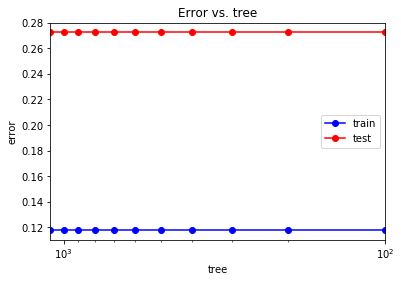

In [41]:
plt.semilogx(tree_arr_gbt, train_err, 'b-o', label = 'train')
plt.semilogx(tree_arr_gbt, test_err, 'r-o', label = 'test')
plt.xlim([np.max(tree_arr_gbt), np.min(tree_arr_gbt)])
plt.title('Error vs. tree')
plt.xlabel('tree')
plt.ylabel('error')
plt.legend()
pass

Наблюдается ярковыраженное переобучение во всех 4х примерах.